# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Train Model on CSOP I and Test on CSOP II

In [3]:
csop_model = ModelBuilder(dataset_names = ["csop"], test_dataset_names=["csopII"])

In [4]:
csop_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
0,0.050000,0.073034,10.000000,1.000000,9,11,44.500000,6.500000,38,51,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
1,0.179487,0.173824,26.000000,9.273618,13,34,108.666667,38.732702,54,139,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
2,0.166667,0.202834,33.333333,10.964589,18,43,149.000000,56.166419,75,211,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
3,0.407915,0.394366,73.000000,54.778341,8,142,355.000000,257.200311,39,669,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
4,0.375758,0.386431,18.333333,13.424687,6,37,75.333333,57.621369,25,156,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,0.263305,0.271260,79.333333,43.622115,47,141,358.000000,205.067469,211,648,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
225,0.300000,0.309524,12.500000,7.500000,5,20,63.000000,39.000000,24,102,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
226,0.348837,0.329574,43.000000,30.000000,13,73,199.500000,131.500000,68,331,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0
227,0.073529,0.089172,34.000000,5.000000,29,39,157.000000,28.000000,129,185,...,0.875,0.958333,0.958333,0.791667,0.875,0.125,0.05,0.970833,0.325,0


In [5]:
csop_model.select_target(target = "zscore_efficiency")

In [6]:
csop_model.select_test_target(target = "efficiency")

Checking Holdout Sets...Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8506	MAE: 0.2998	MSE: 0.1469	RMSE: 0.3833
Validation Set:	R2: -0.23	MAE: 0.9529	MSE: 1.2723	RMSE: 1.128
Test Set:	R2: -0.0883	MAE: 0.8118	MSE: 1.084	RMSE: 1.0412


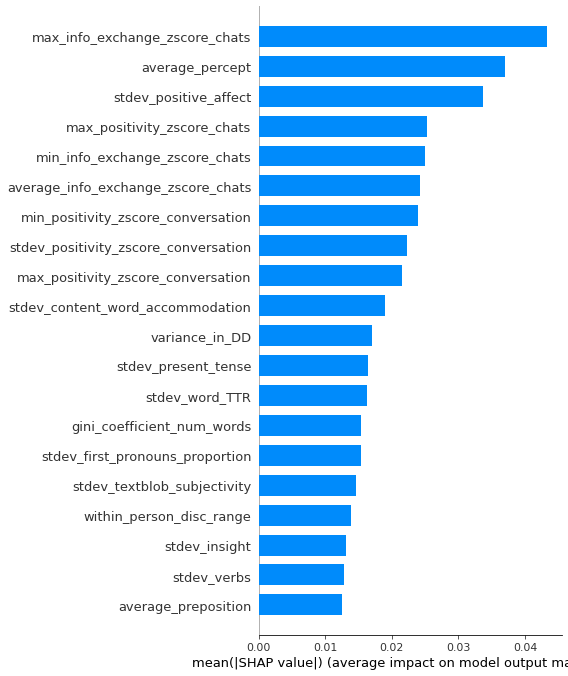

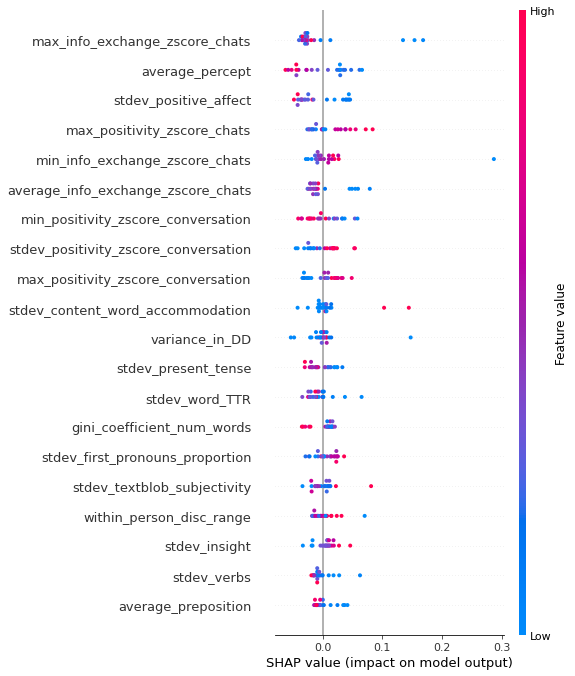

In [26]:
csop_model.define_model(model_type = 'rf')
csop_model.evaluate_model(csop_model.baseline_model)

# Train Model on a Blended CSOP Model

In [8]:
csop_blended_model = ModelBuilder(dataset_names = ["csop", "csopII"])

In [9]:
csop_blended_model.select_target(target=["zscore_efficiency", "efficiency"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8902	MAE: 0.2395	MSE: 0.1108	RMSE: 0.3329
Validation Set:	R2: 0.2219	MAE: 0.6416	MSE: 0.7717	RMSE: 0.8785
Test Set:	R2: 0.6211	MAE: 0.4451	MSE: 0.3545	RMSE: 0.5954


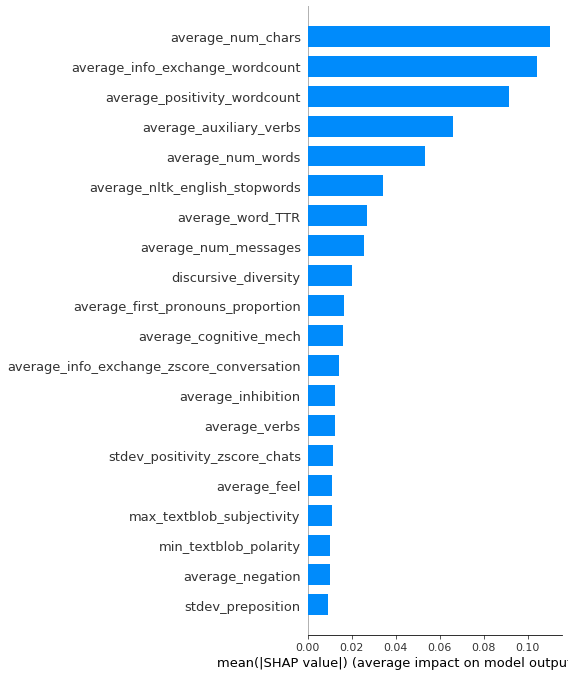

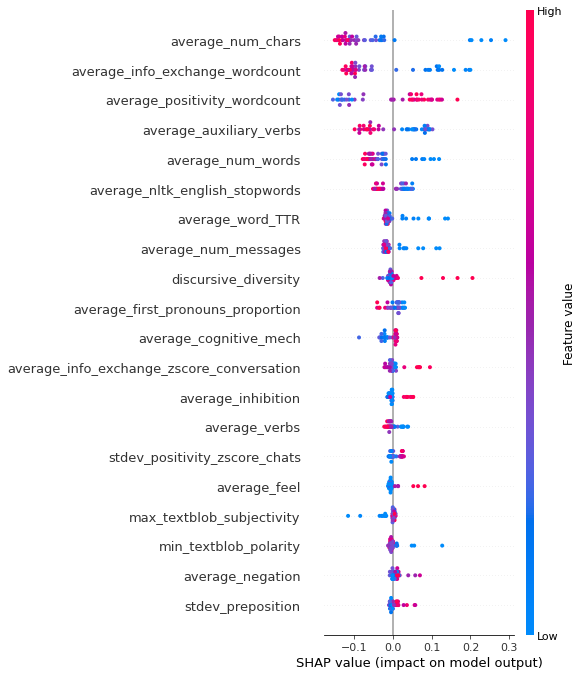

In [10]:
csop_blended_model.define_model(model_type = 'rf')
csop_blended_model.evaluate_model(csop_blended_model.baseline_model)

### Emily Checking Train-Test Split Functionality

In [11]:
csop_blended_model.X_train

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
310,-0.578137,-0.614147,0.531966,0.096719,0.376452,0.173883,0.455094,0.090276,0.225040,0.049030,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
195,-0.058315,-0.273060,0.204777,0.258202,-0.314431,0.017102,0.115733,0.117964,-0.331173,-0.165095,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
98,-0.234025,-0.657131,0.117526,0.105047,0.376452,0.134688,0.047860,-0.213105,0.558767,-0.062315,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
426,-0.952470,-0.722028,0.558141,-0.262006,1.067336,0.330664,0.452185,-0.148946,0.581016,0.288850,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
240,-2.008270,-1.730057,-1.234855,-1.156613,-0.807920,-1.276343,-1.242924,-1.160359,-0.798392,-1.278546,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1.072016,1.060066,-0.449601,0.030514,-0.807920,-0.296460,-0.524205,-0.074788,-0.776143,-0.370655,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
446,-1.107287,-1.044569,0.793717,-0.228325,1.462126,0.252274,0.782335,-0.155217,1.404210,0.254590,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
12,0.411891,0.674879,1.688034,2.564187,1.264731,2.251234,1.225928,2.376608,0.736755,1.881940,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
43,-0.029639,-0.085773,-0.187850,-0.131810,-0.413129,-0.296460,-0.218780,-0.193955,-0.397918,-0.336395,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0


In [12]:
csop_blended_model.X_val

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
20,0.194135,0.184182,-0.253288,-0.004014,-0.117036,-0.139679,-0.247869,0.023897,-0.064191,-0.122270,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
176,-1.321806,-1.335132,0.226589,-0.679750,0.869940,-0.218070,0.149669,-0.701896,0.781252,-0.293570,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
213,-1.059866,-1.120978,-0.056975,-0.576433,0.475150,-0.374851,-0.104852,-0.631861,0.469773,-0.430610,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
476,0.154091,0.440051,-0.318726,-0.112289,-0.314431,-0.374851,-0.083036,0.308883,-0.331173,-0.096575,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
34,-0.463727,-0.700642,-0.689540,-0.689257,-0.314431,-0.727609,-0.640558,-0.736549,-0.197682,-0.721821,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
142,1.276949,1.273159,0.837342,2.114880,-0.511827,1.467328,0.707191,1.916516,-0.575906,1.299520,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
392,0.940404,1.174587,-0.940385,-0.674679,-0.807920,-0.884390,-0.879323,-0.558942,-0.820640,-0.773211,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
36,-0.806959,-0.511854,-0.427789,-0.679750,-0.117036,-0.610023,-0.364221,-0.509288,-0.242179,-0.533391,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
332,0.794790,0.933946,0.024823,0.454105,-0.807920,0.330664,0.155123,0.725506,-0.820640,0.759925,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
38,0.175933,0.313853,-0.820416,-0.679750,-0.709222,-0.845195,-0.790846,-0.626845,-0.664901,-0.781776,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0


In [13]:
csop_blended_model.X_test

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q18ans_recog,Q19time_solvability,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive
93,1.486455,1.628658,-0.820416,-0.281414,-0.709222,-0.610023,-0.887807,-0.384732,-0.753895,-0.696126,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
320,0.154091,0.483251,-0.776791,-0.602548,-0.511827,-0.649218,-0.786968,-0.513859,-0.575906,-0.584781,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
55,-0.252507,-0.436633,-0.166038,-0.207605,-0.314431,-0.335656,-0.209084,-0.277837,-0.331173,-0.447740,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
30,1.866929,1.534686,-0.624102,0.210885,-0.709222,-0.257265,-0.640558,0.041323,-0.664901,-0.344960,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
449,-0.870186,-1.127066,-0.056975,-0.460397,0.376452,-0.335656,0.127853,-0.531515,0.736755,-0.259310,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
456,1.059399,1.091851,0.335652,1.219152,-0.314431,1.114570,0.463820,1.455882,-0.331173,1.368040,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
433,-1.191378,-1.177137,1.153625,-0.170307,1.955614,0.487446,1.102304,-0.155217,1.893678,0.443020,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
76,-0.806959,0.313853,-1.213043,-1.101913,-0.807920,-1.237148,-1.217472,-1.064788,-0.820640,-1.218591,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
271,0.519980,0.470028,0.924593,1.568519,-0.413129,2.094453,1.027160,1.545932,-0.442415,2.070371,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0
9,-1.661500,-1.284454,0.815530,-0.773714,2.054312,0.134688,0.745975,-0.372907,1.737938,0.271720,...,0.0,-1.110223e-16,-1.110223e-16,0.0,0.0,0.0,0.0,1.110223e-16,-5.551115e-17,0.0


# Juries Model

In [14]:
juries_model = ModelBuilder(dataset_names = ["juries"])

In [15]:
juries_model.select_target(target=["majority_pct"])

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8625	MAE: 0.3252	MSE: 0.1418	RMSE: 0.3766
Validation Set:	R2: -0.075	MAE: 0.7765	MSE: 0.8238	RMSE: 0.9076
Test Set:	R2: 0.1239	MAE: 0.7152	MSE: 0.7548	RMSE: 0.8688


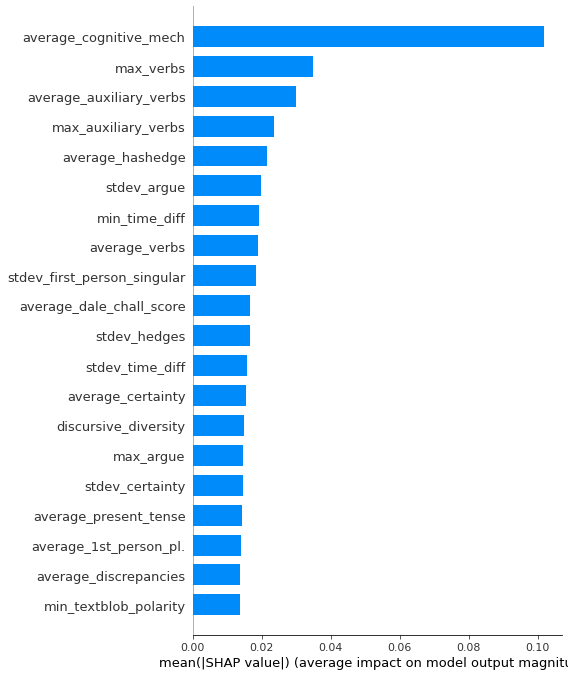

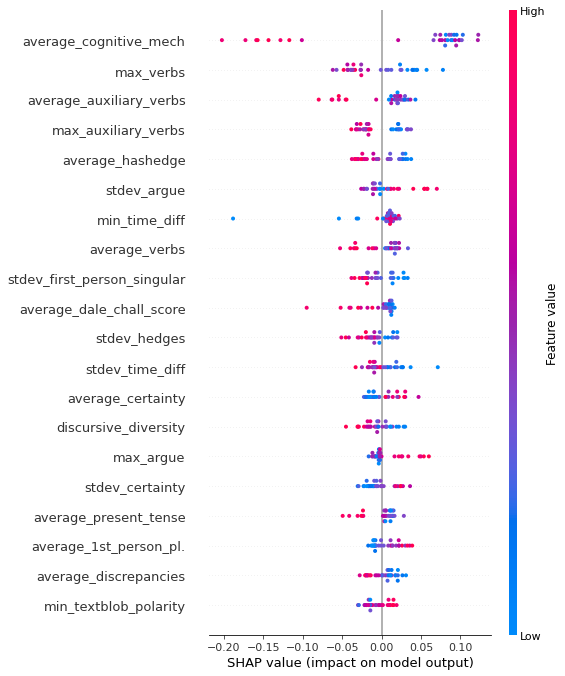

In [16]:
juries_model.define_model(model_type = 'xgb')
juries_model.evaluate_model(csop_blended_model.baseline_model)

# Multi-Task Joint Model

In [17]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])

In [18]:
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])

In [19]:
# has combined targets
joint_model.conv

,gini_coefficient_num_words,gini_coefficient_num_chars,average_num_words,stdev_num_words,min_num_words,max_num_words,average_num_chars,stdev_num_chars,min_num_chars,max_num_chars,...,Q20type_3_type_4,Q22confl_tradeoffs,Q23ss_out_uncert,Q24eureka_question,Q2intel_manip_1,Q21intellective_judg_1,Q5creativity_input_1,Q25_type6_mixed_motive,target_raw,target_std
0,0.159463,0.166055,107.000000,33.948490,30,140,536.625000,168.104088,183,725,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
1,0.125695,0.124663,109.833333,28.457083,76,169,576.666667,151.855926,433,903,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.600000,-1.370166
2,0.224885,0.220860,66.428571,27.338393,18,114,346.142857,141.756762,124,619,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.666667,-0.979051
3,0.261432,0.248455,86.600000,42.898019,25,159,446.600000,211.715469,122,789,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,0.750000,-0.490158
4,0.113767,0.106352,132.200000,28.237564,103,183,677.000000,140.125658,543,934,...,0.181818,0.863636,0.590909,0.0,0.03913,0.365217,0.208696,1,1.000000,0.976522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,0.398707,0.398876,14.500000,10.331989,1,30,66.750000,47.567715,4,128,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.104625,-0.362219
1041,0.333333,0.371585,14.666667,9.568467,6,28,61.000000,44.452222,21,123,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,82.905364,-0.179456
1042,0.183908,0.189744,9.666667,3.299832,6,14,43.333333,15.326085,23,60,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,83.106215,-0.133613
1043,0.180556,0.177709,18.000000,5.958188,11,30,85.375000,27.417775,51,131,...,0.375000,0.208333,1.000000,0.0,0.03750,0.466667,0.758333,0,90.162293,1.476884


In [17]:
# joint_model.viz_target()

## XGBoost

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 1.0	MAE: 0.0027	MSE: 0.0	RMSE: 0.0
Validation Set:	R2: -0.338	MAE: 0.657	MSE: 0.8201	RMSE: 0.9056
Test Set:	R2: -0.1107	MAE: 0.7599	MSE: 0.9311	RMSE: 0.9649


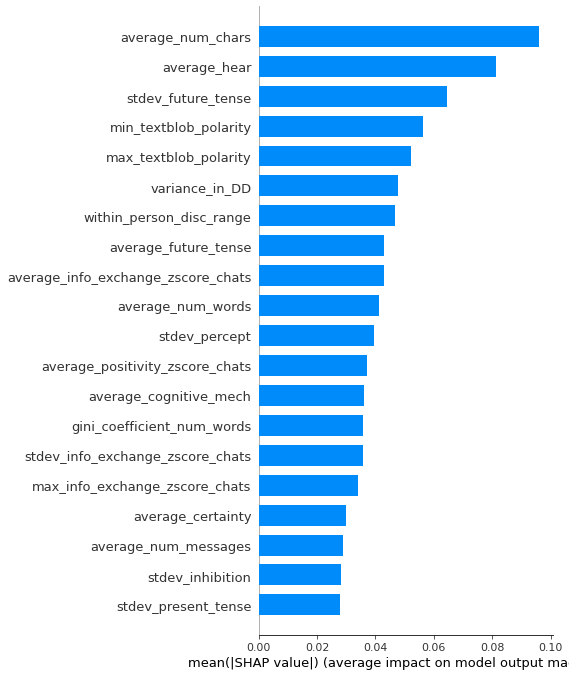

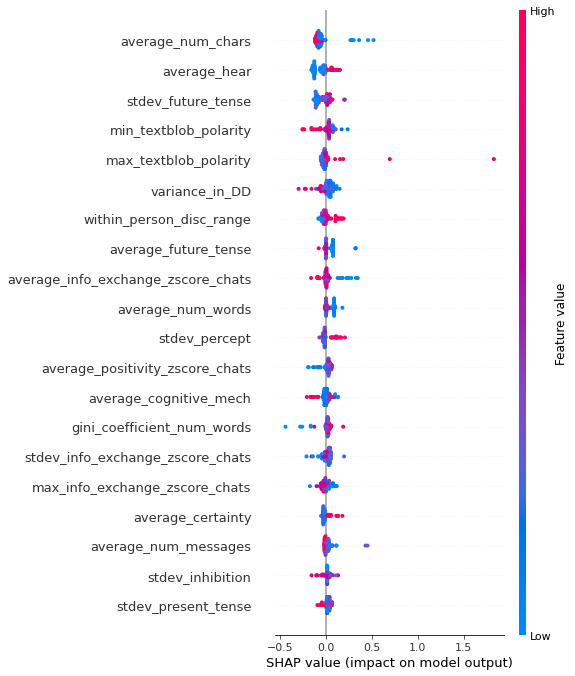

In [20]:
joint_model.define_model(model_type = 'xgb')
joint_model.evaluate_model(joint_model.baseline_model)

## Lasso

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.1122	MAE: 0.715	MSE: 0.9427	RMSE: 0.9709
Validation Set:	R2: 0.0316	MAE: 0.6137	MSE: 0.5936	RMSE: 0.7705
Test Set:	R2: 0.0707	MAE: 0.7312	MSE: 0.7791	RMSE: 0.8827


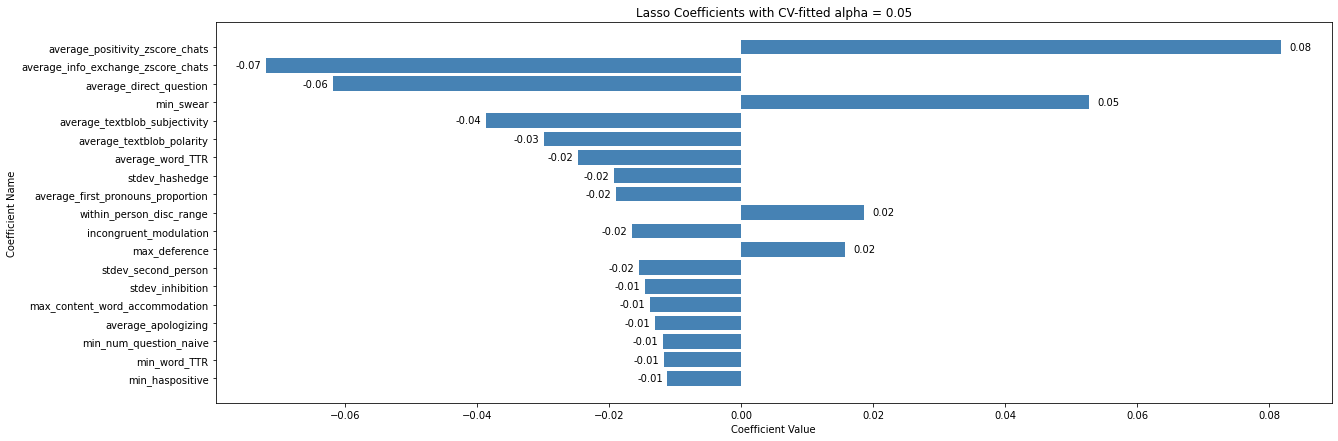

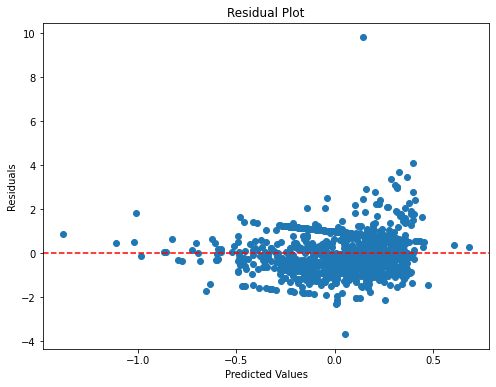

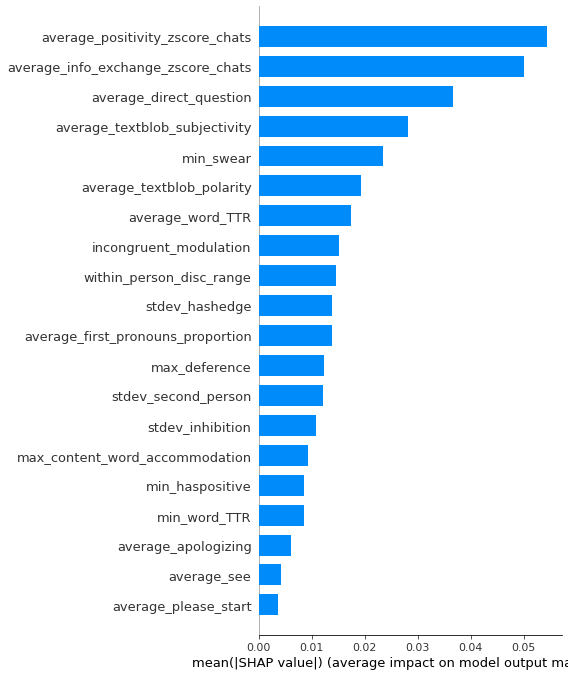

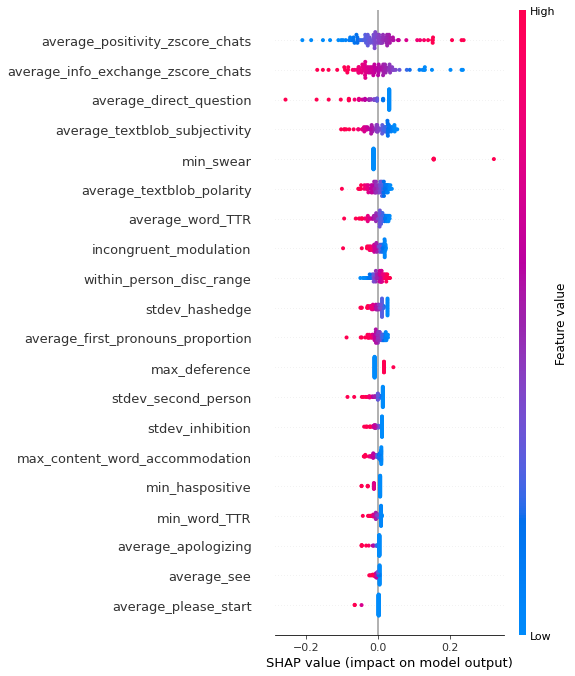

In [21]:
joint_model.define_model(model_type = 'lasso')
joint_model.evaluate_model(joint_model.baseline_model)

## Linear Regression

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.501	MAE: 0.5367	MSE: 0.5299	RMSE: 0.7279
Validation Set:	R2: -7699064096.8509	MAE: 7086.4608	MSE: 4719227718.84	RMSE: 68696.6354
Test Set:	R2: -1.2286	MAE: 1.0303	MSE: 1.8683	RMSE: 1.3669


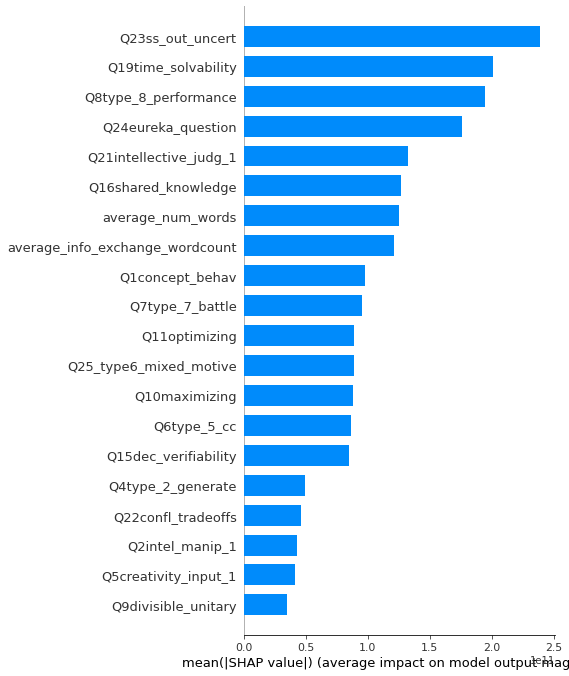

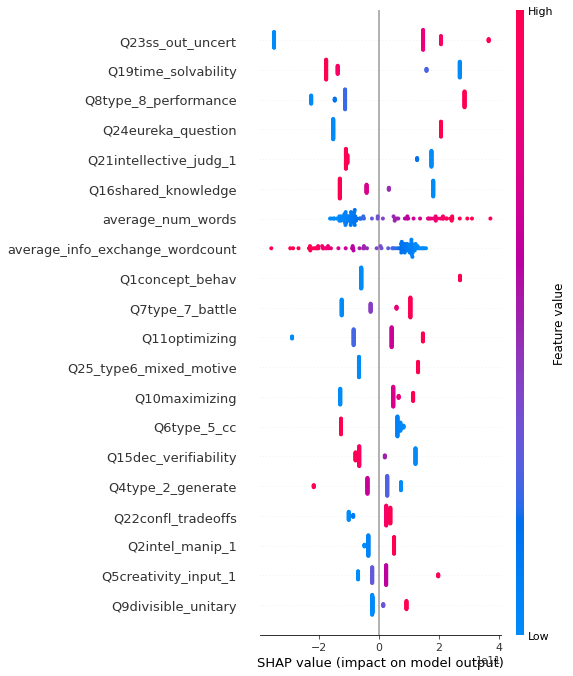

In [22]:
joint_model.define_model(model_type = 'linear')
joint_model.evaluate_model(joint_model.baseline_model)

## Random Forest

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.8709	MAE: 0.2662	MSE: 0.1371	RMSE: 0.3703
Validation Set:	R2: 0.0567	MAE: 0.5855	MSE: 0.5782	RMSE: 0.7604
Test Set:	R2: 0.0679	MAE: 0.7172	MSE: 0.7815	RMSE: 0.884


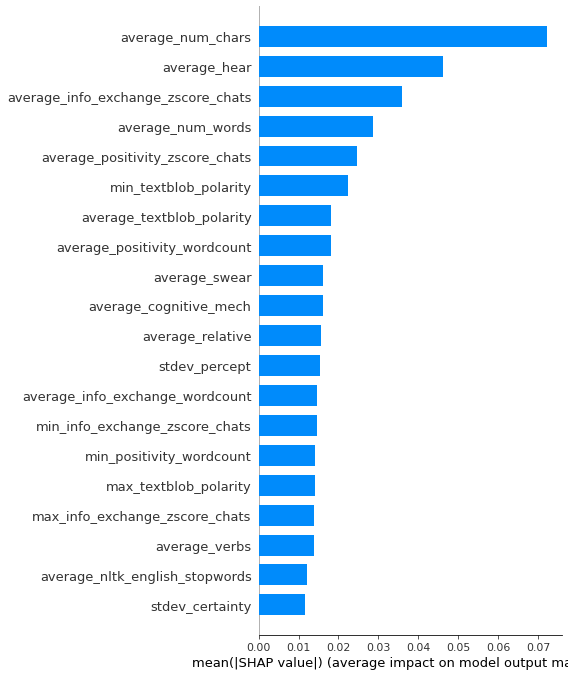

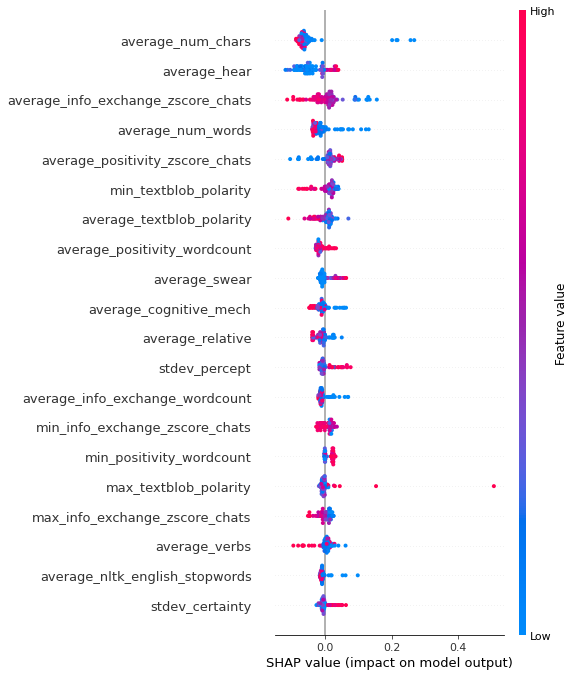

In [23]:
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model)